In [1]:
import sys
from utils.utils import get_args, process_config, create_dirs
from data_loader.cyclegan_data_loader import CycleGANDataLoader
from models.cyclegan_model import CycleGANModel
from trainers.cyclegan_trainer import CycleGANModelTrainer
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

# Load Pipelines
Display sample images from each data pipeline

In [2]:
config, log_dir, checkpoint_dir = process_config("input_params.json")

# create the experiment directories
create_dirs([log_dir, checkpoint_dir])

print('Create the data generator')
data_loader = CycleGANDataLoader(config)

sample_horse = next(iter(data_loader.train_a))
sample_zebra = next(iter(data_loader.train_b))

Create the data generator


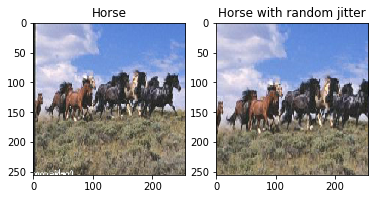

In [3]:
plt.subplot(121)
plt.title('Horse')
plt.imshow(sample_horse[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Horse with random jitter')
plt.imshow(data_loader.random_jitter(sample_horse[0]) * 0.5 + 0.5)

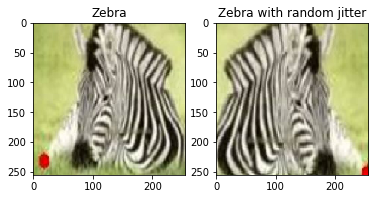

In [4]:
plt.subplot(121)
plt.title('Zebra')
plt.imshow(sample_zebra[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Zebra with random jitter')
plt.imshow(data_loader.random_jitter(sample_zebra[0]) * 0.5 + 0.5)

# Untrained Model

In [5]:
model = CycleGANModel(config, config['weights_path'])

Output of untrained generators

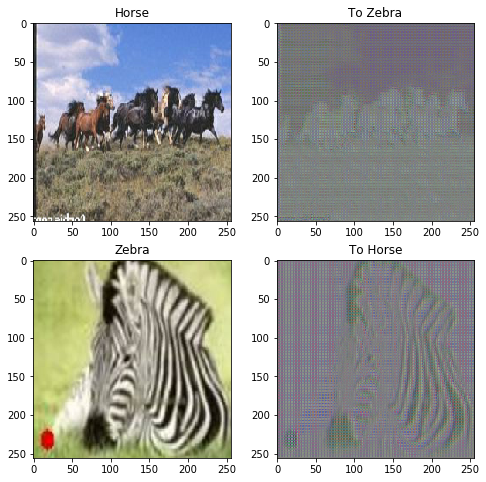

In [6]:
to_zebra = model.g_AB(sample_horse)
to_horse = model.g_BA(sample_zebra)
plt.figure(figsize=(8, 8))
contrast = 8

imgs = [sample_horse, to_zebra, sample_zebra, to_horse]
title = ['Horse', 'To Zebra', 'Zebra', 'To Horse']

for i in range(len(imgs)):
  plt.subplot(2, 2, i+1)
  plt.title(title[i])
  if i % 2 == 0:
    plt.imshow(imgs[i][0] * 0.5 + 0.5)
  else:
    plt.imshow(imgs[i][0] * 0.5 * contrast + 0.5)
plt.show()

Output of untrained discriminators

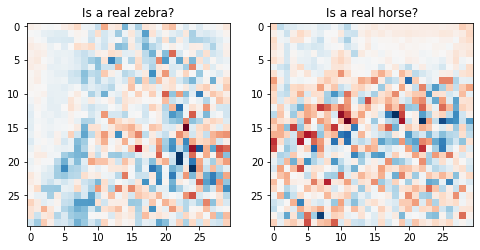

In [7]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Is a real zebra?')
plt.imshow(model.d_A(sample_zebra)[0, ..., -1], cmap='RdBu_r')

plt.subplot(122)
plt.title('Is a real horse?')
plt.imshow(model.d_B(sample_horse)[0, ..., -1], cmap='RdBu_r')

plt.show()


# Train Model

In [ ]:
trainer = CycleGANModelTrainer(model, data_loader.train_a, data_loader.train_b, data_loader.test_a, data_loader.test_b, config, log_dir, checkpoint_dir, sample_horse, viz_notebook=True)

trainer.train()